In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

In [2]:
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [3]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [4]:
Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)

Phi_1 = smp.exp(-2 * (r1 + r2))

In [5]:
# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
cos_theta.simplify()  # Simplified expression of Cos(theta)

sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
Hamiltonian

Psi(r1, theta_1, phi_1, r2, theta_2, phi_2)*V(r1, theta_1, phi_1, r2, theta_2, phi_2) - 0.5*(r2**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r2))/r2**2 - 0.5*(sin(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_2, 2)) + cos(theta_2)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_2))/(r2**2*sin(theta_2)) - 0.5*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_2, 2))/(r2**2*sin(theta_2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), r1))/r1**2 - 0.5*(sin(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (theta_1, 2)) + cos(theta_1)*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), theta_1))/(r1**2*sin(theta_1)) - 0.5*Derivative(Psi(r1, theta_1, phi_1, r2, theta_2, phi_2), (phi_1, 2))/(r1**2*sin(theta_1)**2)

In [9]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()
H_Phi_1

-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2)

In [10]:
f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2) ## Numerator
g_11 = (Phi_1 * Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2) ## Denominator

In [11]:
f_11 = f_11.simplify()
f_11

1.0*r1**2*r2**2*(-4.0 + 1.0/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2))*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [12]:
g_11 = g_11.simplify()
g_11

r1**2*r2**2*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [13]:
P = r1**2 * r2**2 * Phi_1*Phi_1 * smp.sin(theta1)**2 * smp.sin(theta2)**2
P = P.simplify()
P

r1**2*r2**2*exp(-4*r1 - 4*r2)*sin(theta_1)**2*sin(theta_2)**2

In [14]:
# I = smp.integrate(P, (r1, 0, 5), (r2, 0, 5), (theta1, 0, smp.pi), (theta2, 0, smp.pi), (phi1, 0, 2*smp.pi), (phi2, 0, 2*smp.pi))
# I.simplify()
# I

In [15]:
# import numpy as np

# (4 *np.pi**2 * (-221/4 * np.pi**2 * np.exp(20) + 48841/4 * np.pi**2 + np.pi**2/4 * np.exp(40) - 221/4 * np.pi**2 * np.exp(20))) / (1024 * np.exp(40))

In [16]:
# P = P/0.09512597880022271

In [17]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
g_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], g_11)
P_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], P)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 5, 1000)
r2 = np.linspace(0, 5, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

In [19]:
f_11_2d_r1 = f_11_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
f_11_2d_r2 = f_11_f(0.522, np.pi/2, np.pi/4, r2, np.pi/8, 3*np.pi/4)
f_11_2d_theta1 = f_11_f(0.522, theta1, np.pi/4, 0.108, np.pi/8, 3*np.pi/4)
f_11_2d_theta2 = f_11_f(0.522, np.pi/2, np.pi/4, 0.108, theta2, 3*np.pi/4)

In [20]:
g_11_2d_r1 = g_11_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
g_11_2d_r2 = g_11_f(0.522, np.pi/2, np.pi/4, r2, np.pi/8, 3*np.pi/4)
g_11_2d_theta1 = g_11_f(0.522, theta1, np.pi/4, 0.108, np.pi/8, 3*np.pi/4)
g_11_2d_theta2 = g_11_f(0.522, np.pi/2, np.pi/4, 0.108, theta2, 3*np.pi/4)

In [21]:
P_2d_r1 = P_f(r1, np.pi/2, np.pi/4, 0.522, np.pi/8, 3*np.pi/4)
P_2d_r2 = P_f(0.522, np.pi/2, np.pi/4, r2, np.pi/8, 3*np.pi/4)
P_2d_theta1 = P_f(0.522, theta1, np.pi/4, 0.108, np.pi/8, 3*np.pi/4)
P_2d_theta2 = P_f(0.522, np.pi/2, np.pi/4, 0.108, theta2, 3*np.pi/4)

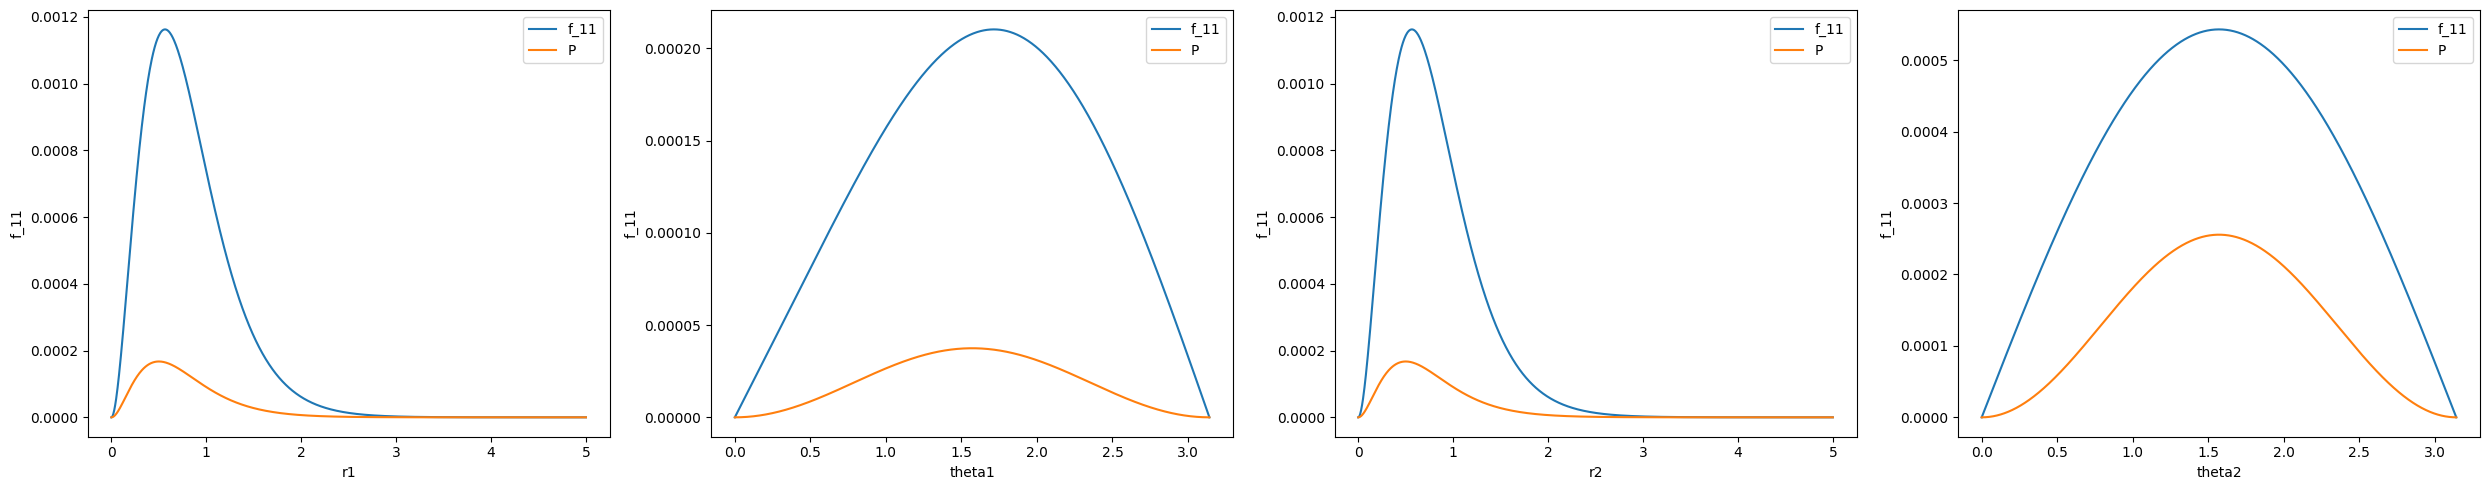

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(25,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions_f = [-f_11_2d_r1, -f_11_2d_theta1, -f_11_2d_r2, -f_11_2d_theta2]
functions_P = [P_2d_r1, P_2d_theta1, P_2d_r2, P_2d_theta2]

variables = [r1, theta1, r2, theta2]
names = ['r1', 'theta1','r2', 'theta2']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(variables[i] , functions_f[i], label = 'f_11')
    ax.plot(variables[i] , functions_P[i], label = 'P')
    ax.set_xlabel(names[i])
    ax.set_ylabel('f_11')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

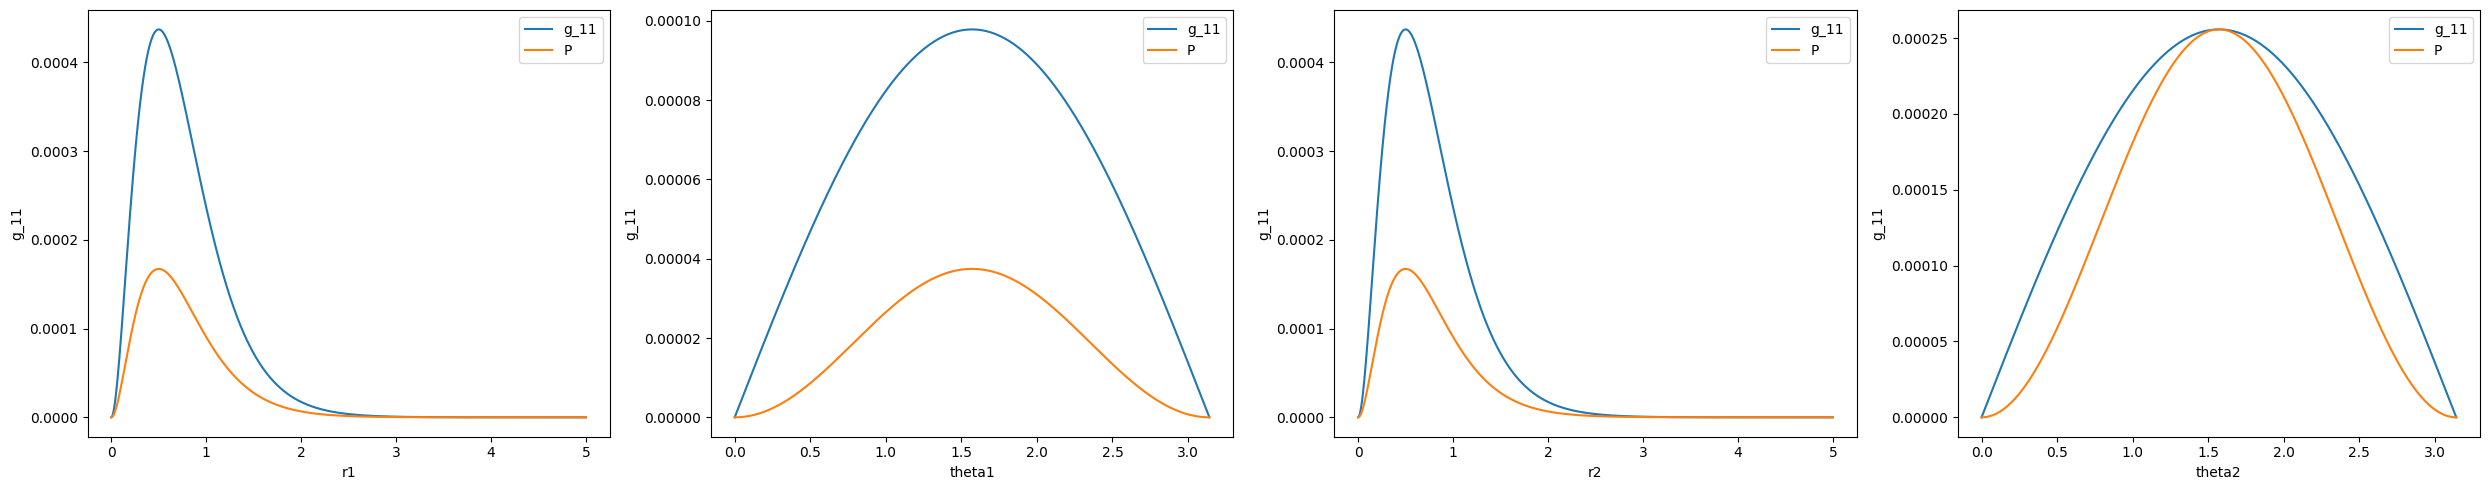

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(25,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions_g = [g_11_2d_r1, g_11_2d_theta1, g_11_2d_r2, g_11_2d_theta2]
functions_P = [P_2d_r1, P_2d_theta1, P_2d_r2, P_2d_theta2]

variables = [r1, theta1, r2, theta2]
names = ['r1', 'theta1', 'r2', 'theta2']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(variables[i] , functions_g[i], label = 'g_11')
    ax.plot(variables[i] , functions_P[i], label = 'P')
    ax.set_xlabel(names[i])
    ax.set_ylabel('g_11')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [24]:
f_11_3d = f_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
g_11_3d = g_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
P_3d = P_f(R1, Theta1, Phi1, R2, Theta2, Phi2)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return 1.0*r1**2*r2**2*(-4.0 + 1.0/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2))*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return 1.0*r1**2*r2**2*(-4.0 + 1.0/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2))*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in multiply
  return 1.0*r1**2*r2**2*(-4.0 + 1.0/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2))*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)


In [25]:
import pandas as pd

# Flatten the arrays
R1_flat = R1.flatten()
R2_flat = R2.flatten()
Theta1_flat = Theta1.flatten()
Theta2_flat = Theta2.flatten()
Phi1_flat = Phi1.flatten()
Phi2_flat = Phi2.flatten()
F11_flat = f_11_3d.flatten()
G11_flat = g_11_3d.flatten()
P1_flat = P_3d.flatten()

# Create the DataFrame
df = pd.DataFrame({'r1': R1_flat, 'theta1': Theta1_flat, 'phi1': Phi1_flat, 'r2': R2_flat, 'theta2': Theta2_flat, 'phi2': Phi2_flat, 'F11': F11_flat, 'G11': G11_flat, 'P1': P1_flat})

# Display the DataFrame
df

,r1,theta1,phi1,r2,theta2,phi2,F11,G11,P1
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00
1,0.005005,0.003145,0.006289,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,0.010010,0.006289,0.012579,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,0.015015,0.009434,0.018868,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,0.020020,0.012579,0.025158,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
999995,4.979980,3.129014,6.258027,5.0,3.141593,6.283185,4.913743e-32,4.395801e-33,6.771452e-51
999996,4.984985,3.132158,6.264317,5.0,3.141593,6.283185,5.254824e-32,3.238040e-33,3.741039e-51
999997,4.989990,3.135303,6.270606,5.0,3.141593,6.283185,5.582152e-32,2.120175e-33,1.633029e-51
999998,4.994995,3.138448,6.276896,5.0,3.141593,6.283185,5.896103e-32,1.041166e-33,4.009724e-52


In [26]:
# Remove rows with nan or inf values in 'F11' or 'P1' columns
df_new = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['F11', 'P1', 'G11'])

# Display the cleaned DataFrame
df_new

,r1,theta1,phi1,r2,theta2,phi2,F11,G11,P1
1,0.005005,0.003145,0.006289,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,0.010010,0.006289,0.012579,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
3,0.015015,0.009434,0.018868,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
4,0.020020,0.012579,0.025158,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
5,0.025025,0.015724,0.031447,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...
999994,4.974975,3.125869,6.251738,5.0,3.141593,6.283185,4.558524e-32,5.594520e-33,1.077234e-50
999995,4.979980,3.129014,6.258027,5.0,3.141593,6.283185,4.913743e-32,4.395801e-33,6.771452e-51
999996,4.984985,3.132158,6.264317,5.0,3.141593,6.283185,5.254824e-32,3.238040e-33,3.741039e-51
999997,4.989990,3.135303,6.270606,5.0,3.141593,6.283185,5.582152e-32,2.120175e-33,1.633029e-51


In [27]:
X_features = df_new.iloc[:, :6].to_numpy()
yf_labels = df_new.iloc[:, 6:8].to_numpy()
yp_labels = df_new.iloc[:, 8:].to_numpy()

print(X_features.shape)
print(yf_labels.shape)
print(yp_labels.shape)

(999332, 6)
(999332, 2)
(999332, 1)


In [28]:
# Define the function
def f(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = f_11_f(r1, theta1, phi1, r2, theta2, phi2) # f_11_f was the lambdified function which converts symbolic expression into numpy arrays

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi2 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result) or np.isinf(result):
          return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity

        else:
          return result

    else:
        return 0   ## The function will return 0 if any of the r1, r2, theta1, theta2, phi1 and phi2 lies outside of their range

def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p = P_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi1 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result_p) or np.isinf(result_p):
          return -np.inf

        else:
          return result_p

    else:
        return 0

def metropolis_sampling(f, p, initial, num_samples, proposal_std):  # Sampling has been done using metropolis algorithm. Here sample is a vector X having 6 components
    samples = []
    current = initial # initial sample which we choose by ourselves. We equated initial sample to current sample
    num_accept = 0

    for _ in range(num_samples):
        while True:
            # Propose a new candidate from a normal distribution. Here proposal_std is the standard deviation which we choose by ourselves.
            candidate = np.random.normal(current, proposal_std, size = 6)

            # Ensure the candidate falls within the specified bounds
            if (0 <= candidate[0] <= 5 and 0 <= candidate[3] <= 5 and
                0 <= candidate[1] <= np.pi and 0 <= candidate[4] <= np.pi and
                0 <= candidate[2] <= 2*np.pi and 0 <= candidate[5] <= 2*np.pi):

                candidate_value_f = f(candidate)
                candidate_value_p = p(candidate)

                # Discard if candidate value is NaN or inf
                if candidate_value_f != -np.inf or candidate_value_p != -np.inf:
                    break

        # Calculate acceptance probability
        acceptance_prob = min(1, candidate_value_p / p(current))

        # Accept or reject the candidate
        if np.random.uniform() < acceptance_prob:
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

# Monte Carlo integration
def monte_carlo_integration(samples, f, p):

    values_f = np.array([f(sample) for sample in samples])
    # Filter out -inf values
    values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

    values_p = np.array([p(sample) for sample in samples])
    # Filter out -inf values
    values_p = values_p[~np.isnan(values_p) & ~np.isinf(values_p)]

    values = values_f / values_p
    values = values[~np.isnan(values) & ~np.isinf(values)]

    return np.mean(values)

In [29]:
X_features[11117]

array([0.63063063, 0.39623691, 0.79247382, 0.05505506, 0.03459211,
       0.06918422])

In [30]:
# Parameters
initial = X_features[11117]
num_samples = 100000
proposal_std = 0.5

# Run Metropolis sampling
result = metropolis_sampling(f, p, initial, num_samples, proposal_std)

samples_f = result[0]
num_accept = result[1]

burn_in = 1000
samples_f = samples_f[burn_in:]

# Perform Monte Carlo integration
integral_estimate_f11 = monte_carlo_integration(samples_f, f, p)
print(f"Estimated integral: {integral_estimate_f11}")
print("Number of Samples Collected: %s"%len(samples_f))
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Estimated integral: -4.367047916663702
Number of Samples Collected: 99000
Number of Samples Accepted: 44678
Fraction Acceptances: 0.44678


In [31]:
# Define the function
def g(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = g_11_f(r1, theta1, phi1, r2, theta2, phi2)

    if 0 <= r1 <= 5 and 0 <= r2 <= 5 and 0 <= theta1 <= np.pi and 0 <= theta2 <= np.pi and 0 <= phi1 <= 2*np.pi and 0 <= phi2 <= 2*np.pi :
        # Check for NaN or inf values
        if np.isnan(result) or np.isinf(result):
          return -np.inf

        else:
          return result

    else:
        return 0

In [32]:
# Parameters
initial_point = X_features[11117]
num_samples = 100000
proposal_std = 0.5

# Run Metropolis sampling
result = metropolis_sampling(g, p, initial_point, num_samples, proposal_std)

samples_g = result[0]
num_accept = result[1]

burn_in = 1000
samples_g = samples_g[burn_in:]

# Perform Monte Carlo integration
integral_estimate_g11 = monte_carlo_integration(samples_g, g, p)
print(f"Estimated integral: {integral_estimate_g11}")
print("Number of Samples Collected: %s"%len(samples_g))
print("Number of Samples Accepted: %s"%(num_accept))
print("Fraction Acceptances: %s"%(num_accept / num_samples))

Estimated integral: 1.5477316305568374
Number of Samples Collected: 99000
Number of Samples Accepted: 44556
Fraction Acceptances: 0.44556


In [33]:
E1 = integral_estimate_f11 / integral_estimate_g11
E1

-2.8215795493515508

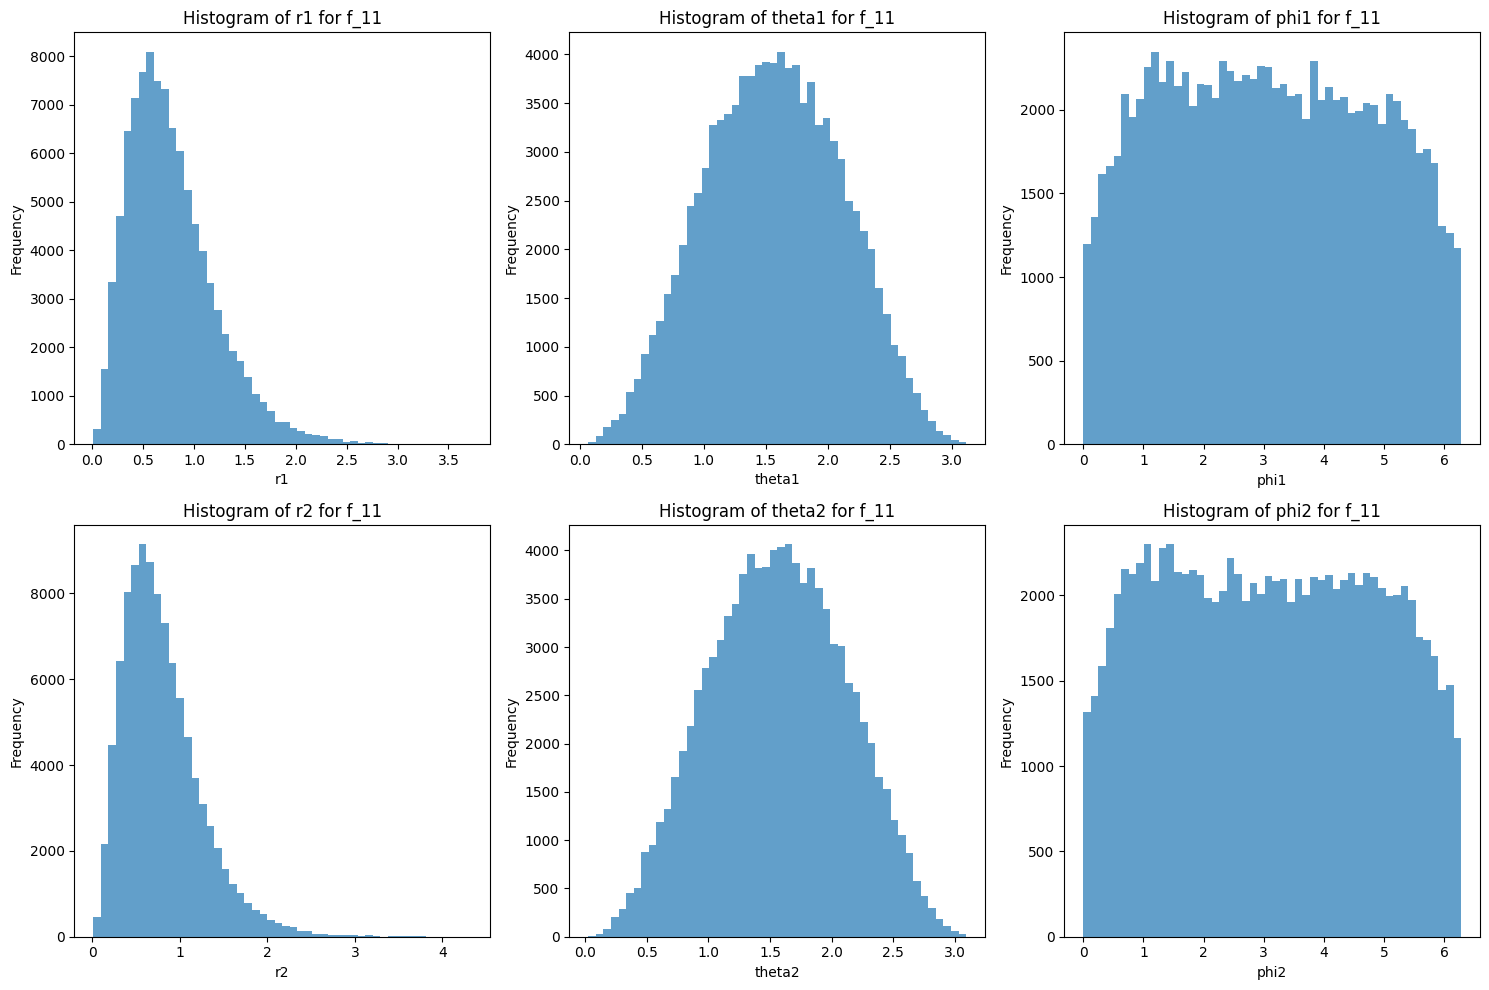

In [34]:
# Plotting histograms for each of the variables to see the distribution of the samples.
variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_f[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for f_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

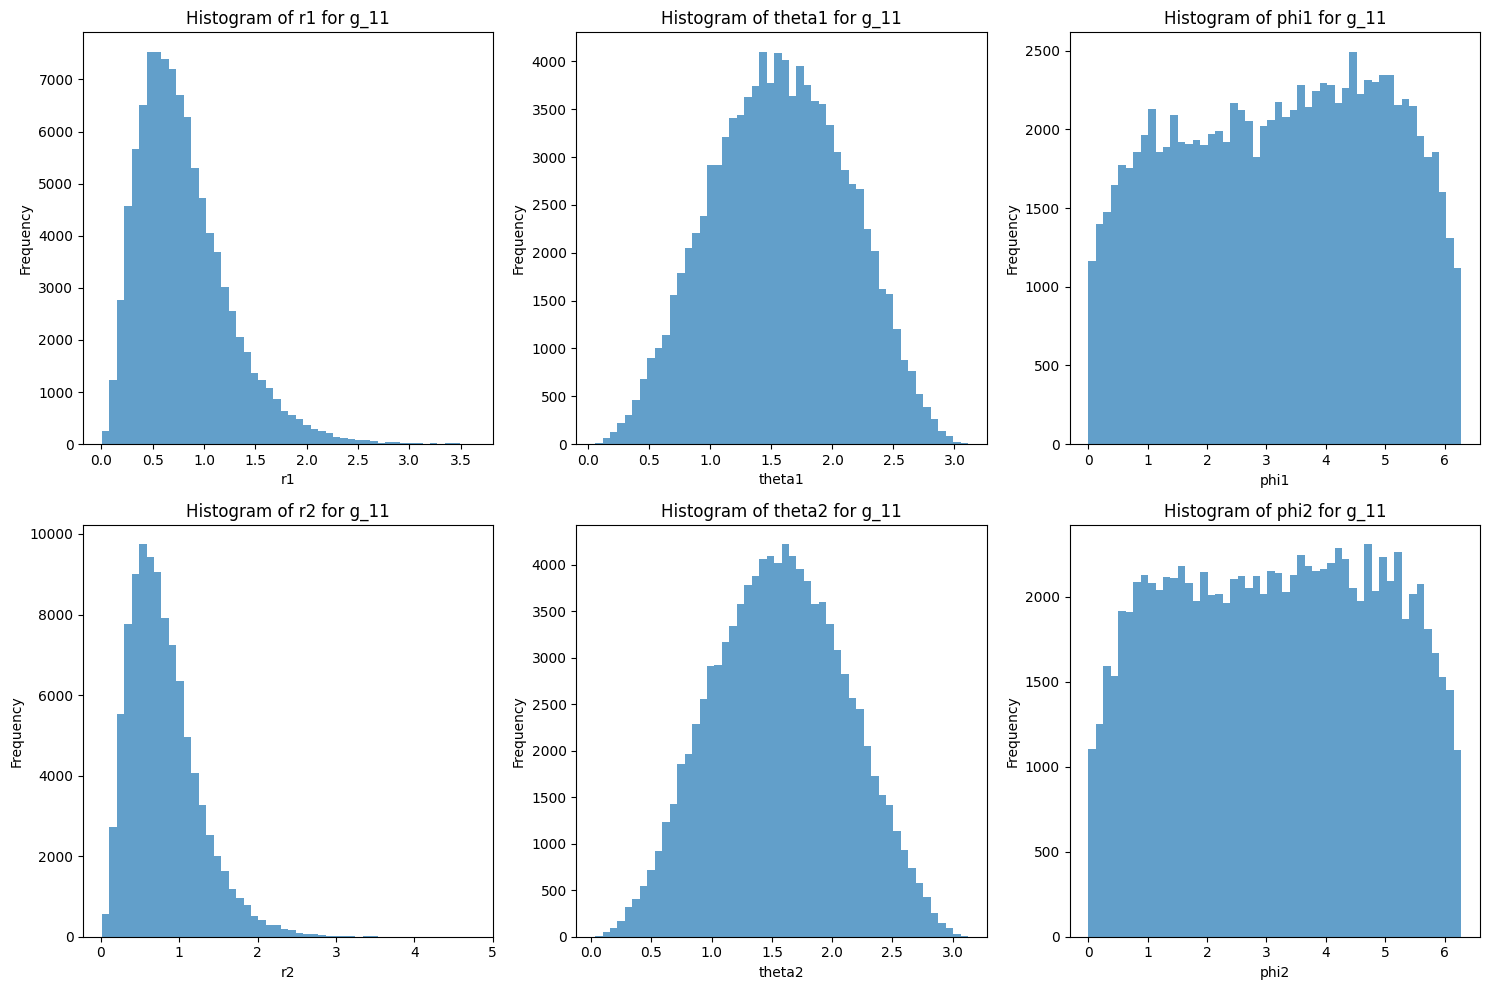

In [35]:
# Plotting histograms for each of the variables to see the distribution of the samples.
variables = ['r1', 'theta1', 'phi1', 'r2', 'theta2', 'phi2']
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

for i in range(6):
    axs[i].hist(samples_g[:, i], bins=50, alpha=0.7)
    axs[i].set_title(f'Histogram of {variables[i]} for g_11')
    axs[i].set_xlabel(variables[i])
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

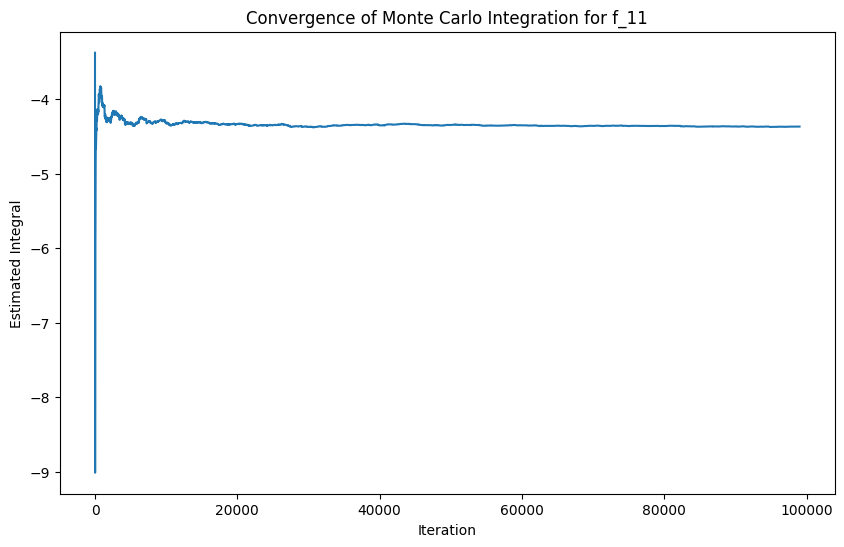

In [36]:
# Plot the running mean of the estimated integral over iterations to see if the Monte Carlo estimate is converging.

values_f = np.array([f(sample) for sample in samples_f])
# Filter out -inf values
values_f = values_f[~np.isnan(values_f) & ~np.isinf(values_f)]

values_p = np.array([p(sample) for sample in samples_f])
# Filter out -inf values
values_p = values_p[~np.isnan(values_p) & ~np.isinf(values_p)]

values = values_f / values_p
values = values[~np.isnan(values) & ~np.isinf(values)]

# Running mean of the integral estimate
integral_estimates = np.cumsum(values) / np.arange(1, len(values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration for f_11')
plt.show()

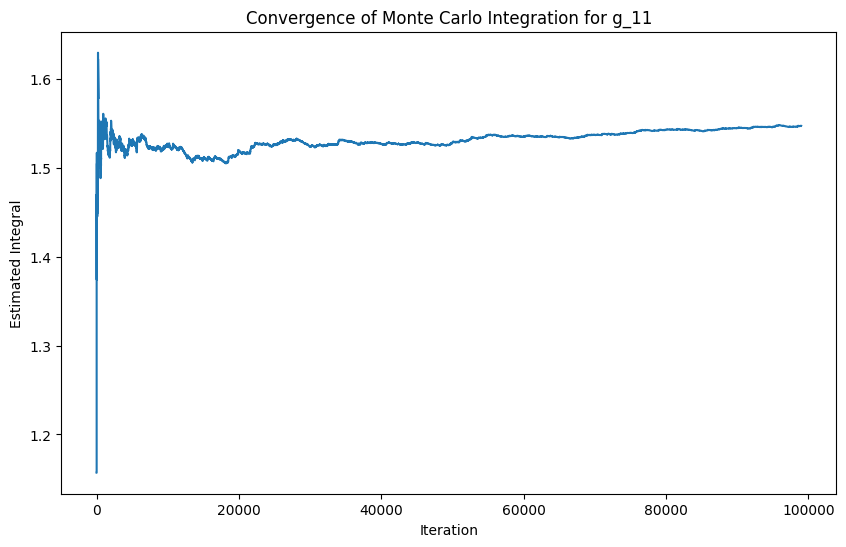

In [37]:
# Plot the running mean of the estimated integral over iterations to see if the Monte Carlo estimate is converging.

values_g = np.array([g(sample) for sample in samples_g])
# Filter out -inf values
values_g = values_g[~np.isnan(values_g) & ~np.isinf(values_g)]

values_p = np.array([p(sample) for sample in samples_g])
# Filter out -inf values
values_p = values_p[~np.isnan(values_p) & ~np.isinf(values_p)]

values = values_g / values_p
values = values[~np.isnan(values) & ~np.isinf(values)]

# Running mean of the integral estimate
integral_estimates = np.cumsum(values) / np.arange(1, len(values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(integral_estimates)
plt.xlabel('Iteration')
plt.ylabel('Estimated Integral')
plt.title('Convergence of Monte Carlo Integration for g_11')
plt.show()

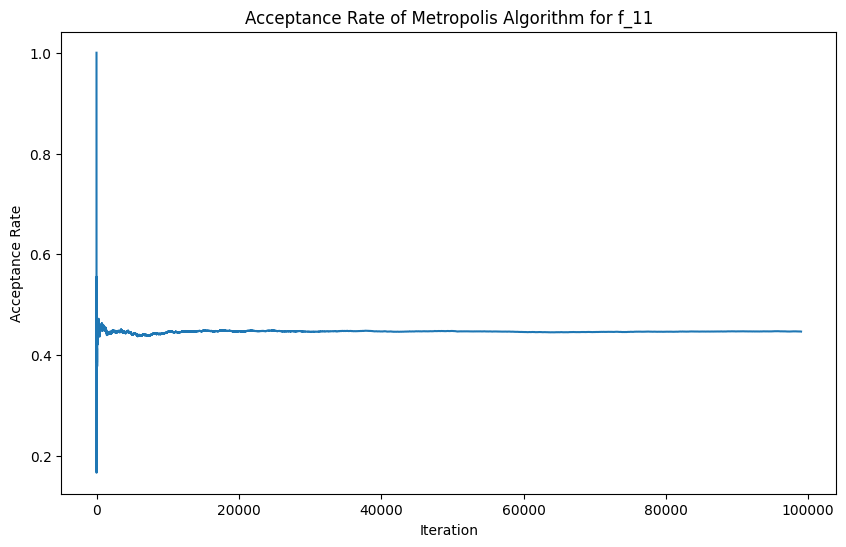

In [38]:
# Plotting the acceptance rate over iterations to understand the efficiency of the Metropolis algorithm. We plot the ratio of accepted moves to the total number of moves
# over iterations.

acceptance_rates = np.cumsum(np.diff(samples_f, axis=0).any(axis=1)) / np.arange(1, num_samples - 1000)
plt.figure(figsize=(10, 6))
plt.plot(acceptance_rates)
plt.xlabel('Iteration')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Metropolis Algorithm for f_11')
plt.show()

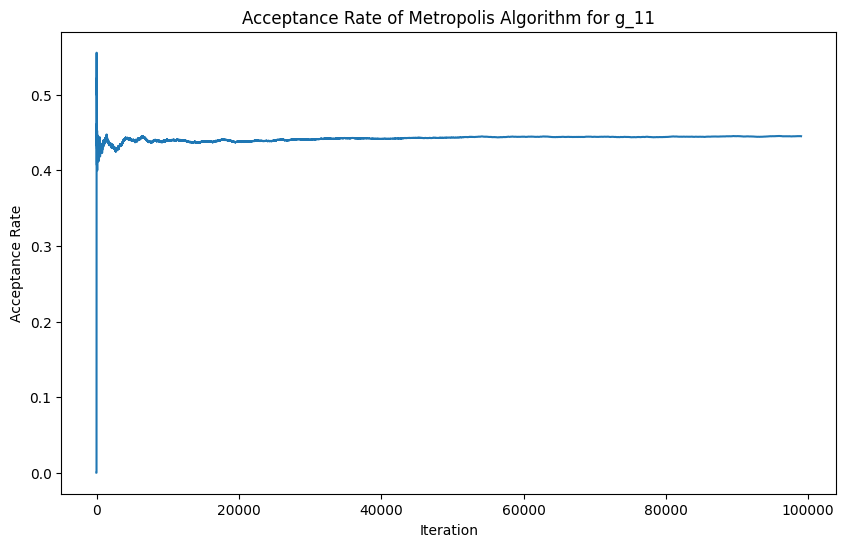

In [39]:
# Plotting the acceptance rate over iterations to understand the efficiency of the Metropolis algorithm. We plot the ratio of accepted moves to the total number of moves
# over iterations.

acceptance_rates = np.cumsum(np.diff(samples_g, axis=0).any(axis=1)) / np.arange(1, num_samples - 1000)
plt.figure(figsize=(10, 6))
plt.plot(acceptance_rates)
plt.xlabel('Iteration')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate of Metropolis Algorithm for g_11')
plt.show()

The energy values obtained for different runs are as follows (considering normalizing factor of Sampling function P): \\

1st run : E1 = -2.8302229861444923, f_11 = -0.4164656906764375, g_11 = 0.14714942699400985 \\
2nd run : E1 = -2.831480033863355, f_11 = -0.4139673418949899, g_11 = 0.14620175206750818   \\
3rd run : E1 = -2.839482422132545, f_11 = -0.4161686901355088, g_11 = 0.14656498201631843 \\
4th run : E1 = -2.83399346483133, f_11 = -0.414555388854563 , g_11 = 0.14627958532686172 \\
5th run : E1 = -2.8179821581255515, f_11 = -0.4137286017966296, g_11 = 0.14681732480230858 \\

The energy values obtained for different runs are as follows (not considering normalizing factor of Sampling function P): \\

1st run : E1 = -2.8337834551993195, f_11 = -4.376798121989047, g_11 = 1.5445069078791684 \\
2nd run : E1 = -2.826362040080394, f_11 = -4.377435906410465, g_11 = 1.5487881044022058  \\
3rd run : E1 = -2.8067355118150337, f_11 = -4.320929691641697, g_11 = 1.539485880822265 \\
4th run : E1 = -2.8488892469506246, f_11 = -4.3869115605900175 , g_11 = 1.5398673589314331 \\
5th run : E1 = -2.8215795493515508, f_11 = -4.367047916663702, g_11 = 1.5477316305568374 \\